# Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Plot correlations

<AxesSubplot:>

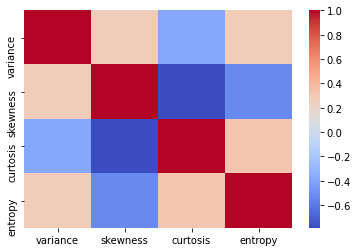

In [4]:
correlations = df.drop(columns=['class']).corr()
sns.heatmap(correlations,cmap='coolwarm')

In [5]:
data = df.values

column = 1
left = data[data[:,column]>1]

In [6]:
left

array([[ 3.6216  ,  8.6661  , -2.8073  , -0.44699 ,  0.      ],
       [ 4.5459  ,  8.1674  , -2.4586  , -1.4621  ,  0.      ],
       [ 3.4566  ,  9.5228  , -4.0112  , -3.5944  ,  0.      ],
       ...,
       [-2.1668  ,  1.5933  ,  0.045122, -1.678   ,  1.      ],
       [-2.41    ,  3.7433  , -0.40215 , -1.2953  ,  1.      ],
       [ 0.40614 ,  1.3492  , -1.4501  , -0.55949 ,  1.      ]])

In [7]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

# Define functions

In [49]:
def label_counts(data):
    counts = {}
    for row in data:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [208]:
def classify(data):
    labels = data[:,-1]
    classes,classes_count = np.unique(label_column,return_counts=True)
    
    max_index = classes_count.argmax()
    classification = classes[index]
    
    return classification

In [50]:
# split the dataset based on wether a feature > value
def split_by_value(data,column,value):
    left = data[data[:,column] > value]
    right = data[data[:,column] <= value]
    
    return left,right

In [51]:
def gini(data):
    
    impurity = 1
    
    class_counts = label_counts(data)
    for label in class_counts:
        impurity -= (class_counts[label]/len(data))**2
    
    return impurity

In [52]:
gini(data)

0.49386310125882926

In [53]:
data[:,0]

array([ 3.6216,  4.5459,  3.866 , ..., -3.7503, -3.5637, -2.5419])

In [54]:
def information_gain(current_uncertainity,left,right):
    
    weight = float(len(left)/(len(left)+len(right)))
    
    return weight*gini(left) + (1-weight)*gini(right)

In [55]:
idx_to_feature = {0: 'variance', 1: 'skewness',2: 'curtosis', 3: 'entropy', 4: 'class'}

In [213]:
data.shape[1]-1

4

In [264]:
def fetch_possible_splits(data):
    
    possible_splits = {}
    n_columns = data.shape[1]
    for column in range(n_columns - 1):        
        possible_splits[column] = []
        values = data[:, column]
        unique_vals = np.unique(values)

        for val_index in range(len(unique_vals)):
            if val_index != 0:
                current = unique_vals[val_index]
                previous = unique_vals[val_index - 1]
                split = (current + previous) / 2
                
                possible_splits[column].append(split)
    
    return possible_splits

In [265]:
fetch_possible_splits(data)

{0: [-7.03925,
  -6.998150000000001,
  -6.85625,
  -6.7456499999999995,
  -6.69485,
  -6.61415,
  -6.5504,
  -6.51595,
  -6.46655,
  -6.4113,
  -6.382899999999999,
  -6.35215,
  -6.30895,
  -6.2409,
  -6.18175,
  -6.1584,
  -6.1067,
  -5.9816,
  -5.8926,
  -5.8774,
  -5.755,
  -5.581,
  -5.50755,
  -5.48545,
  -5.4611,
  -5.41355,
  -5.34345,
  -5.29775,
  -5.26745,
  -5.22275,
  -5.1855,
  -5.1438500000000005,
  -5.1203,
  -5.093299999999999,
  -5.05765,
  -5.0389,
  -4.98815,
  -4.94545,
  -4.9154,
  -4.87075,
  -4.849,
  -4.8408999999999995,
  -4.7927,
  -4.73965,
  -4.7048000000000005,
  -4.65515,
  -4.6053999999999995,
  -4.565049999999999,
  -4.52885,
  -4.5021,
  -4.492850000000001,
  -4.482,
  -4.4777000000000005,
  -4.43965,
  -4.39925,
  -4.39215,
  -4.38245,
  -4.372,
  -4.32995,
  -4.2909500000000005,
  -4.2873,
  -4.26495,
  -4.23865,
  -4.2291,
  -4.21795,
  -4.210050000000001,
  -4.202450000000001,
  -4.17185,
  -4.1454,
  -4.1419,
  -4.13265,
  -4.1015,
  -4.07325,
  -4

In [273]:
def best_partition(data,possible_splits):
    
    highest_gain = 0
    current_uncertainity = gini(data)
    n_features = data.shape[1] - 1
    
    for column in possible_splits:
        
        for val in possible_splits[column]:
            
            left,right = split_by_value(data,column,val)
            
            info_gain = information_gain(current_uncertainity,left,right)
            
            if info_gain > highest_gain:
                highest_gain = info_gain
                best_feature = column
                best_value = val
    
    print('Is '+ idx_to_feature[best_feature] + ' > '+ str(best_value))
        
    return highest_gain,best_feature,best_value
        

In [270]:
best_partition(data,fetch_possible_splits(data))

Is entropy > -6.81485


(3, -6.81485)

In [165]:
idx_to_feature

{0: 'variance', 1: 'skewness', 2: 'curtosis', 3: 'entropy', 4: 'class'}

In [274]:
class Leaf:
    
    def __init__(self,data):
        predictions = label_counts(data)

In [275]:
class Node:
    
    def __init__(self,left,right,feature,value):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right

In [283]:
def create_tree(data):
    
    gain,feature,value = best_partition(data,fetch_possible_splits(data))
    
    if gain == 0:
        return Leaf(data)
    
    left,right = split_by_value(data,feature,value)
    
    print('left branch made')
    left_branch = create_tree(left)
    
    print('right branch made')
    right_branch = create_tree(right)
    
    return Node(left_branch,right_branch,feature,value)

In [284]:
tree = create_tree(data)

Is entropy > -6.81485
left branch made
Is curtosis > 1.28625
left branch made
Is curtosis > 1.5103
left branch made
Is entropy > 1.3653
left branch made
Is curtosis > 2.1298
left branch made
Is entropy > 1.4784000000000002
left branch made
Is entropy > 2.11075
left branch made
Is variance > 3.72705
left branch made


UnboundLocalError: local variable 'best_feature' referenced before assignment

In [209]:
a = [5,4,3,2,1]
a

[5, 4, 3, 2, 1]

In [210]:
unique_vals, counts_unique_vals = np.unique(a, return_counts=True)

In [211]:
unique_vals

array([1, 2, 3, 4, 5])

In [204]:
index = counts_unique_classes.argmax()
classification = unique_classes[index]